# CITS4403 Project
Dylan Bell 21711951 <br>
Ryan Hodgson 21969062 <br>
Harry Brooker 21983613 <br>
James Tambakis 21962012 <br>

# Error And Attack Tolerance Of Complex Networks
*Reka Albert, Hawoong Jeong & Albert-Laszlo Barabasi*

Import all required libraries :

In [91]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random

Initalise and set seed to ensure results can be replicated :

In [92]:
seed = 123
random.seed(seed)
np.random.seed(seed)

## 1. Introduction

### 1.1 Overview

- 2 x Paragraph - overview of paper
- 1 x Paragraph - Include definitions - e.g. failure, attack, error, tolerance, complex network, diameter (as defined in the paper!!)
- 1 x Paragraph - Explain experiment - What graphs were used, difficulties e.t.c

## 2 Erdos-Renyi Graph

### 2.1 Overview

- Explanation - include how it's created, key properties and characteristics, real-life examples, idk if there's any relevant graphs that highlight it's properties

### 2.2 Implementation

The below function creates an ER graph using the NetworkX ER_graph function 

In [93]:
def create_ER_graph(N, p, seed):
    '''
        N : Number of nodes
        P : Probability that each node is connected
        Seed : For reproduction of results
    
    '''
    return nx.erdos_renyi_graph(N, p, seed)

### 2.3 Visualisation

Create an Erdos-Renyi Graph with N = 300 and P = 0.1 and display the resulting graph

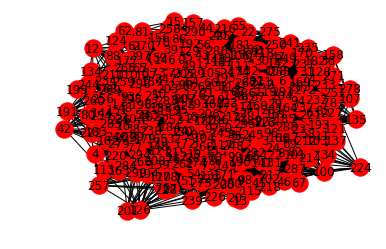

In [94]:
N = 300
P = 0.1
ER_graph = create_ER_graph(N, P, seed)
limits = plt.axis('off')
nx.draw_networkx(ER_graph)

## 3 Scale-Free Graph

### 3.1 Overview

- Explanation - include how it's created, key properties and characteristics, real-life examples, idk if there's any relevant graphs that highlight it's properties

### 3.2 Implementation

The below function creates a Barabasi-Albert Graph using the Networkx barabasi_albert_graph function

In [145]:
def create_SF_graph(N, M, seed):
    '''
        N : Number of nodes
        M : Number of edges to attach from a new node to an existing node
        seed : For reproduction of results
    '''
    return nx.barabasi_albert_graph(N, M, seed)

### 3.3 Visualisation

Create a Scale Free Graph with N = 300 and M = 7

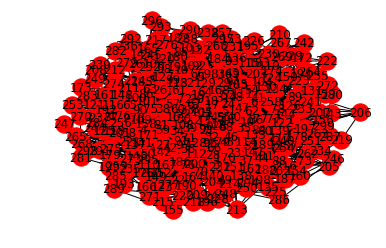

In [96]:
N = 300
M = 7
SF_graph = create_SF_graph(N, M, seed)
limits = plt.axis('off')
nx.draw_networkx(SF_graph)

## 4. Experiment 1

## 4.1 Overview

- Need to include the below in some way shape or form :
- We will see the effect of an attack/failure on two different types of networks
- To measure this "effect" we will be graphing the diameter of the graph vs the fraction of nodes removed
- What do we expect overselves to occur? - some sort of reasoning or logic
- What does the paper expect to happen? - quick summary of what paper found

## 4.2 Common Functionality

In [97]:
remove_range = list(np.arange(0.005, 0.055, 0.005))

In [98]:
def get_diameter(G):
    return nx.average_shortest_path_length(G)

## 4.3 Failure

In [99]:
def delete_random_nodes(G, f, L):
    G_local = G.copy()
    N = len(G_local.nodes)
    delete_amount = int(N * f)
    count = 1

    for node in L:
        G_local.remove_node(node)

        if count >= delete_amount:
            break
        else:
            count = count + 1
    
    return G_local

In [100]:
def generate_failure(G, remove_range):
    diameters = []

    for f in remove_range:
        G_random_nodes = list(G.nodes())
        random.shuffle(G_random_nodes)
        deleted_graph = delete_random_nodes(G, f, G_random_nodes)
        recalculated_diameter = get_diameter(deleted_graph)
        diameters.append(recalculated_diameter)

    return diameters

## 4.4 Attack

In [101]:
def delete_connected_nodes(G, f, L):          
    G_local = G.copy()

    N = len(G_local.nodes)
    delete_amount = int(N * f)
    count = 1

    for (node, _) in L:
        G_local.remove_node(node)
            
        if count >= delete_amount:
            break
        else:
            count = count + 1

    return G_local

In [102]:
def get_most_connected_nodes(G):
    degrees = list(G.degree)
    degrees.sort(key=lambda tup: tup[1], reverse=True)
    return degrees

In [103]:
def generate_attack(G, remove_range):
    connected_nodes_list = get_most_connected_nodes(G) 
    diameters = []

    for f in remove_range:
        modified_graph = delete_connected_nodes(G, f, connected_nodes_list)
        recalculated_diameter = get_diameter(modified_graph)
        diameters.append(recalculated_diameter)

    return diameters

## 4.5 Run Experiment

In [104]:
def generate_experiment_1_graph(x, graph_data):    
    
    plt.plot(x, graph_data[0], marker='^', label="ER Failure", color="b")
    plt.plot(x, graph_data[1], marker='D', label="ER Attack", color="r")
    plt.plot(x, graph_data[2], marker='s', label="SF Failure",color="b")
    plt.plot(x, graph_data[3], marker='o', label="SF Attack",color="r")   
    plt.xlabel('Fraction f of nodes removed')
    plt.ylabel('Diameter d')
    plt.legend(loc='upper right')
    plt.title("Failure & Attack On SF & ER Graph")
    plt.show()

In [105]:
ER_failure_diameters = generate_failure(ER_graph, remove_range)

In [106]:
ER_attack_diameters = generate_attack(ER_graph, remove_range)

In [107]:
SF_failure_diameters = generate_failure(SF_graph, remove_range)

In [108]:
SF_attack_diameters = generate_attack(SF_graph, remove_range)

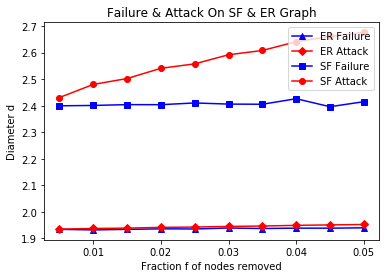

In [109]:
graph_data = [ER_failure_diameters, ER_attack_diameters, SF_failure_diameters, SF_attack_diameters]
generate_experiment_1_graph(remove_range, graph_data)

## 4.6 Discussion Of Generated Results

Need to answer the following questions :
    - Differences between what we got and what the papers got
    - Why the results differ
    - What could be improved 

## 5. Experiment 1 - Facebook

## 5.1 Overview

- Need to explain :
- Why we chose facebook (internet and WWW were too big?)
- High density of facebook graph means we won't see the same results
- Results we are expecting

## 5.2 Common Functionality

In [110]:
def sample_path_lengths(G, trials=1000):
    nodes = list(G)

    pairs = np.random.choice(nodes, (trials, 2)) 

    lengths = [nx.shortest_path_length(G, *pair) 
               for pair in pairs]
    
    return lengths

In [111]:
def estimate_path_length(G, trials=1000):
    return np.mean(sample_path_lengths(G, trials))

In [112]:
def max_subgraph_diameter(G):
    subgraphs = nx.connected_component_subgraphs(G)
    subgraph_diameters = []
    
    for subgraph in subgraphs:
        L = estimate_path_length(subgraph)
        if L != 0.0:
            subgraph_diameters.append(L)

    L = max(subgraph_diameters)
    return L

## 5.3 Failure

In [113]:
def facebook_generate_failure(G, num_nodes, range):
    diameters = []

    for f in range:
        G_random_nodes = list(G.nodes())
        random.shuffle(G_random_nodes)

        G_modified = delete_random_nodes(G, f, G_random_nodes)
        diameter = max_subgraph_diameter(G_modified)
        diameters.append(diameter)
    
    return diameters

## 5.4 Attack

In [114]:
def facebook_generate_attack(G, num_nodes, range):
    diameters = []

    for f in range:
        G_connected_nodes = get_most_connected_nodes(G)
        G_modified = delete_connected_nodes(G, f, G_connected_nodes)
        diameter = max_subgraph_diameter(G_modified)
        diameters.append(diameter)

    return diameters

## 5.5 Run Experiment

In [115]:
def generate_facebook_graph(attack, failure, x):
    plt.plot(x, failure, marker='s', label="Facebook Failure", color="b")
    plt.plot(x, attack, marker='o', label="Facebook Attack", color="r")
    plt.xlabel('Fraction of nodes removed')
    plt.ylabel('Diameter d Of Largest Subgraph')
    plt.legend(loc='upper right')
    plt.title("Failure & Attack On Facebook Graph")
    plt.show()

In [116]:
def read_graph(filename):
    G = nx.Graph()
    array = np.loadtxt(filename, dtype=int)
    G.add_edges_from(array)
    return G

In [117]:
facebook = read_graph('facebook_combined.txt.gz')
N = len(facebook.nodes())
remove_range = list(np.arange(0.00, 0.055, 0.005))

In [118]:
facebook_attack_diameters = facebook_generate_attack(facebook, N, remove_range)

In [119]:
facebook_failure_diameters = facebook_generate_failure(facebook, N, remove_range)

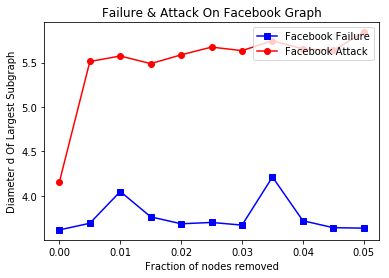

In [120]:
generate_facebook_graph(facebook_attack_diameters, facebook_failure_diameters, remove_range)

## 5.4 Discussion Of Generated Results

- Re-iterate the difference between the facebook graph and the internet graph 
- Any other observations... all about density of graph - change in these properties have led to different graphs being generated
- We also find the diameter of the largest cluster in the facebook graph..... does that make a difference?

# 6. Experiment 2

## 6.1 Overview

## 6.2 Common Functionality

In [121]:
def get_largest_cluster_len(G):
    sub_graphs_sorted = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)
    largest_cluster = sub_graphs_sorted[0]
    return len(largest_cluster)

In [122]:
def get_isolated_clusters_len(G):
    sub_graphs_sorted = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)
    
    if len(sub_graphs_sorted) == 1:
        return 0

    largest_cluster = sub_graphs_sorted[0]
    sub_graphs_sorted.remove(largest_cluster)

    subgraph_sizes = []
    for subgraph in sub_graphs_sorted:
        subgraph_size = len(subgraph)
        subgraph_sizes.append(subgraph_size)

    return np.mean(subgraph_sizes)

In [135]:
def generate_experiment_2_graph(name, remove_range, Failure_big_S, Attack_big_S, Failure_small_s, Attack_small_s):
    plt.plot(remove_range, Failure_big_S, marker='^', linestyle = 'None', label="Failure S", color="b", markerfacecolor='none')
    plt.plot(remove_range, Attack_big_S, marker='D', linestyle = 'None', label="Attack S", color="r", markerfacecolor='none')
    plt.plot(remove_range, Failure_small_s, marker='^', linestyle = 'None', label="Failure <s>", color="b",)
    plt.plot(remove_range, Attack_small_s, marker='D', linestyle = 'None', label="Attack <s>", color="r")
    plt.xlabel('Fraction f of nodes removed')
    plt.ylabel('S')
    plt.legend(loc='upper right')
    plt.title(name)
    plt.show()

In [136]:
N = 1000
M = 2
P = 0.002
remove_range = list(np.arange(0.0, 1, 0.01))

## 6.3 Failure

In [123]:
def generate_failure_big_S(G, remove_range, system_size):
    S = []

    for f in remove_range:
        G_random_nodes = list(G.nodes())
        random.shuffle(G_random_nodes)
        modified_graph = delete_random_nodes(G, f, G_random_nodes)
        size_of_lg_cluster = get_largest_cluster_len(modified_graph)
        fraction_of_system = size_of_lg_cluster/system_size
        S.append(fraction_of_system)

    return S 

In [124]:
def generate_failure_small_s(G, remove_range):
    S = []
    G_random_nodes = list(G.nodes())
    random.shuffle(G_random_nodes)

    for f in remove_range:
        modified_graph = delete_random_nodes(G, f, G_random_nodes)
        avg_isolated_cluster = get_isolated_clusters_len(modified_graph)
        S.append(avg_isolated_cluster)
    
    return S

## 6.4 Attack

In [131]:
def generate_attack_big_S(G, remove_range, system_size):
    connected_nodes_list = get_most_connected_nodes(G) 
    S = []

    for f in remove_range:
        modified_graph = delete_connected_nodes(G, f, connected_nodes_list)
        size_of_lg_cluster = get_largest_cluster_len(modified_graph)
        fraction_of_system = size_of_lg_cluster/system_size
        S.append(fraction_of_system)
    
    return S

In [132]:
def generate_attack_small_s(G, remove_range):
    connected_nodes_list = get_most_connected_nodes(G) 
    S = []

    for f in remove_range:
        modified_graph = delete_connected_nodes(G, f, connected_nodes_list)
        avg_isolated_cluster = get_isolated_clusters_len(modified_graph)
        S.append(avg_isolated_cluster)
    
    return S

## 6.5 ER Graph - Run Experiment

In [137]:
ER_graph = create_ER_graph(N, P, seed)

In [138]:
ER_system_size = len(ER_graph)

In [139]:
ER_Failure_big_S = generate_failure_big_S(ER_graph, remove_range, ER_system_size)

In [140]:
ER_Attack_big_S = generate_attack_big_S(ER_graph, remove_range, ER_system_size)

In [141]:
ER_Failure_small_s = generate_failure_small_s(ER_graph, remove_range)

In [142]:
ER_Attack_small_s = generate_attack_small_s(ER_graph, remove_range)

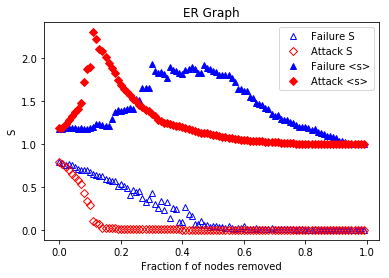

In [143]:
generate_graph("ER Graph", remove_range, ER_Failure_big_S, ER_Attack_big_S, ER_Failure_small_s, ER_Attack_small_s)

## 6.5 SF Graph - Run Experiment

In [148]:
SF_graph = create_SF_graph(N, M, seed)

In [151]:
SF_system_size = len(SF_graph)

In [152]:
SF_Failure_big_S = generate_failure_big_S(SF_graph, remove_range, SF_system_size)

In [153]:
SF_Attack_big_S = generate_attack_big_S(SF_graph, remove_range, SF_system_size)

In [154]:
SF_Failure_small_s = generate_failure_small_s(SF_graph, remove_range)

In [155]:
SF_Attack_small_s = generate_attack_small_s(SF_graph, remove_range)

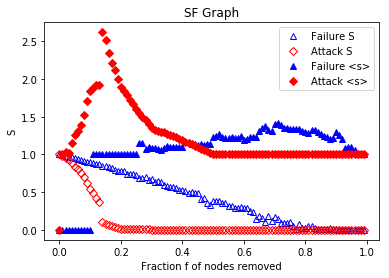

In [156]:
generate_graph("SF Graph", remove_range, SF_Failure_big_S, SF_Attack_big_S, SF_Failure_small_s, SF_Attack_small_s)

## 6.6 Facebook Graph - Run Experiment

In [157]:
remove_range = list(np.arange(0.0,0.5, 0.01))

In [159]:
facebook_system_size = len(facebook)

In [160]:
facebook_Failure_big_S = generate_failure_big_S(facebook, remove_range, facebook_system_size)

In [ ]:
facebook_Attack_big_S = generate_attack_big_S(facebook, remove_range, facebook_system_size)

In [ ]:
facebook_Failure_small_s = generate_failure_small_s(facebook, remove_range)

In [ ]:
facebook_Attack_small_s = generate_attack_small_s(facebook, remove_range)

In [ ]:
generate_graph("Facebook Graph", remove_range, facebook_Failure_big_S, facebook_Attack_big_S, facebook_Failure_small_s, facebook_Attack_small_s)

## 6.6 Discussion On Generated Results